In [1]:
import gym


#定义环境
class MyWrapper(gym.Wrapper):

    def __init__(self):
        env = gym.make('MountainCarContinuous-v0', render_mode='rgb_array')
        super().__init__(env)
        self.env = env
        self.step_n = 0

    def reset(self):
        state, _ = self.env.reset()
        self.step_n = 0
        return state

    def step(self, action):
        state, reward, done, _, info = self.env.step(action)

        reward = -1.0
        if done:
            reward = 100

        self.step_n += 1
        if self.step_n >= 400:
            done = True

        return state, reward, done, info


env = MyWrapper()

env.reset()

array([-0.58244264,  0.        ], dtype=float32)

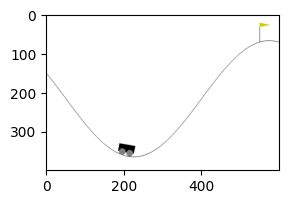

In [2]:
from matplotlib import pyplot as plt

%matplotlib inline


#打印游戏
def show():
    plt.figure(figsize=(3, 3))
    plt.imshow(env.render())
    plt.show()


show()

In [3]:
#认识游戏环境
def test_env():
    print('env.observation_space=', env.observation_space)
    print('env.action_space=', env.action_space)

    state = env.reset()
    action = env.action_space.sample()
    next_state, reward, done, info = env.step(action)

    print('state=', state)
    print('action=', action)
    print('next_state=', next_state)
    print('reward=', reward)
    print('done=', done)
    print('info=', info)


test_env()

env.observation_space= Box([-1.2  -0.07], [0.6  0.07], (2,), float32)
env.action_space= Box(-1.0, 1.0, (1,), float32)
state= [-0.44963592  0.        ]
action= [-0.6594274]
next_state= [-0.45117524 -0.00153932]
reward= -1.0
done= False
info= {}


In [4]:
from stable_baselines3 import TD3
from stable_baselines3.common.env_util import make_vec_env

#初始化模型
model = TD3(
    policy='MlpPolicy',
    env=make_vec_env(MyWrapper, n_envs=1),  #使用N个环境同时训练
    learning_rate=1e-3,
    buffer_size=100_0000,
    learning_starts=400,
    batch_size=400,
    gamma=0.99,
    train_freq=(1, 'episode'),
    verbose=0)

model

In [5]:
from stable_baselines3.common.evaluation import evaluate_policy

evaluate_policy(model, env, n_eval_episodes=20, deterministic=False)

/root/anaconda3/envs/pt39/lib/python3.9/site-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


(-400.0, 0.0)

In [6]:
# #训练
# model.learn(20_0000, progress_bar=True)

# #保存模型
# model.save('save/8.TD3.Mountain Car Continuous')

In [7]:
#加载模型
model = TD3.load('save/8.TD3.Mountain Car Continuous')

evaluate_policy(model, env, n_eval_episodes=20, deterministic=False)

(31.4, 1.9339079605813716)

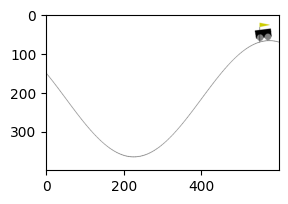

31.0 70 [-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, 100]


In [13]:
from IPython import display
import random


def test():
    state = env.reset()
    reward_sum = []
    over = False
    while not over:
        action, _ = model.predict(state)
        state, reward, over, _ = env.step(action)
        reward_sum.append(reward)

        if len(reward_sum) % 5 == 0:
            display.clear_output(wait=True)
            show()

    print(sum(reward_sum), len(reward_sum), reward_sum)


test()